In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [28]:
iris=datasets.load_iris() 
X=iris.data
y=iris.target
names=iris.target_names

In [29]:
X.shape

(150, 4)

In [30]:
y.shape

(150,)

In [31]:
df=pd.DataFrame(X,columns=iris.feature_names)
df['species']=y
df['species']=df['species'].replace({0:'setosa',1:'versicolor',2:'virginica'})
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


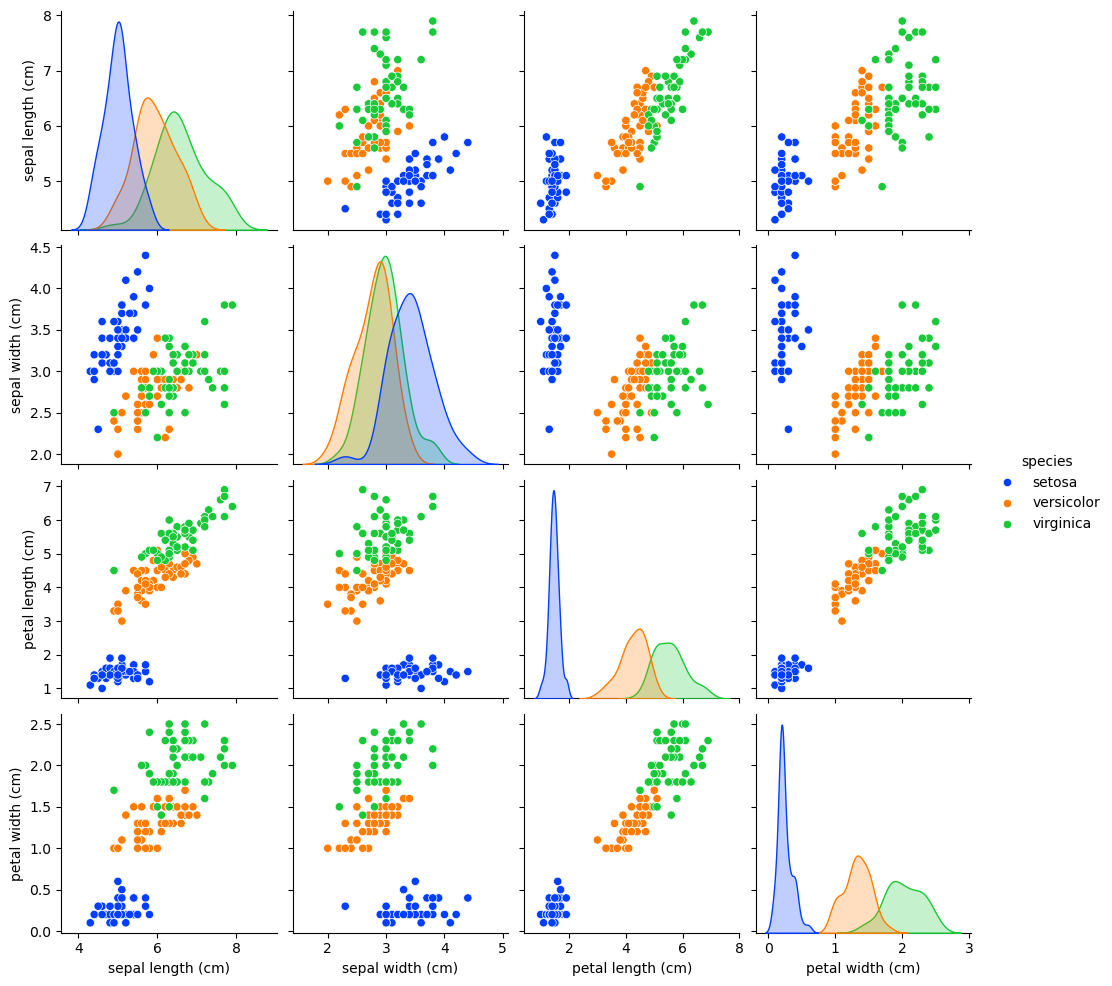

In [32]:
import seaborn as sns
sns.pairplot(df,hue='species',palette='bright')

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [34]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [35]:
from sklearn.svm import SVC
svm=SVC(kernel='linear',random_state=1)
svm.fit(X_train,y_train)

SVC(kernel='linear', random_state=1)

In [36]:
pred=svm.predict(X_test)
pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2])

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [38]:
df1=pd.read_csv('drug200.csv')
df1

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [39]:
df1.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [40]:
df1[df1.duplicated()]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug


Sex
M    104
F     96
Name: count, dtype: int64


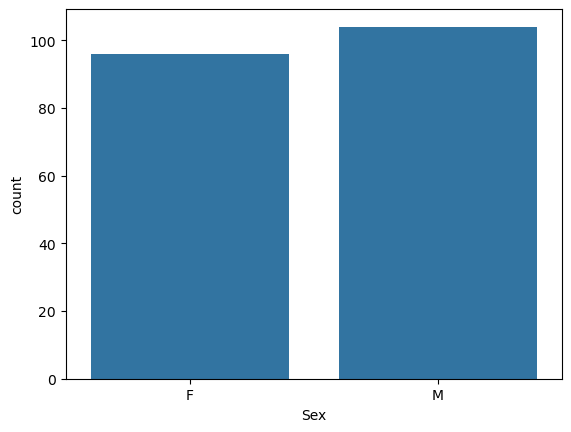

In [41]:
x=df1.Sex.value_counts()
print(x)
p=sns.countplot(data=df1,x='Sex')
plt.show()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


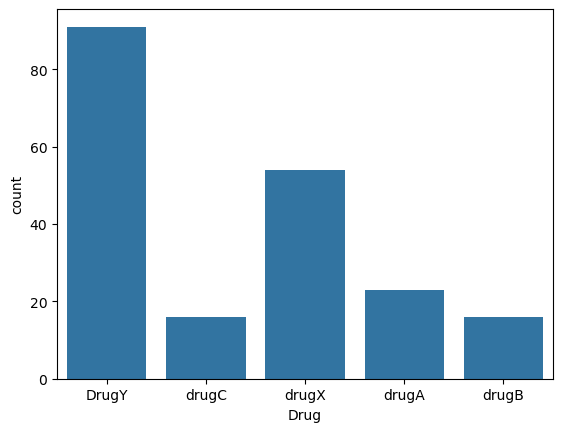

In [42]:
x=df1.Drug.value_counts()
print(x)
p=sns.countplot(data=df1,x='Drug')

In [43]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df1['BP']=oe.fit_transform(df1[['BP']])
df1['Cholesterol']=oe.fit_transform(df1[['Cholesterol']])
df1['Sex']=oe.fit_transform(df1[['Sex']])
df1['Drug']=oe.fit_transform(df1[['Drug']])
df1

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0.0,0.0,0.0,25.355,0.0
1,47,1.0,1.0,0.0,13.093,3.0
2,47,1.0,1.0,0.0,10.114,3.0
3,28,0.0,2.0,0.0,7.798,4.0
4,61,0.0,1.0,0.0,18.043,0.0
...,...,...,...,...,...,...
195,56,0.0,1.0,0.0,11.567,3.0
196,16,1.0,1.0,0.0,12.006,3.0
197,52,1.0,2.0,0.0,9.894,4.0
198,23,1.0,2.0,1.0,14.020,4.0


In [44]:
x1=df1.drop('Drug',axis=1)
y1=df1['Drug'] 

In [45]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test=train_test_split(x1,y1 ,test_size=0.2,random_state=42)

In [46]:
from sklearn.tree import DecisionTreeClassifier
cls_gini=DecisionTreeClassifier(criterion='gini',random_state=0)
cls_gini.fit(X1_train,y1_train)
y1_pred_gini=cls_gini.predict(X1_test)
y1_pred_gini

array([4., 0., 4., 3., 0., 0., 0., 4., 1., 4., 1., 4., 0., 1., 2., 0., 2.,
       4., 3., 0., 2., 4., 4., 0., 0., 0., 3., 4., 0., 4., 0., 3., 3., 0.,
       1., 0., 4., 1., 0., 1.])

In [47]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y1_test,y1_pred_gini))

1.0


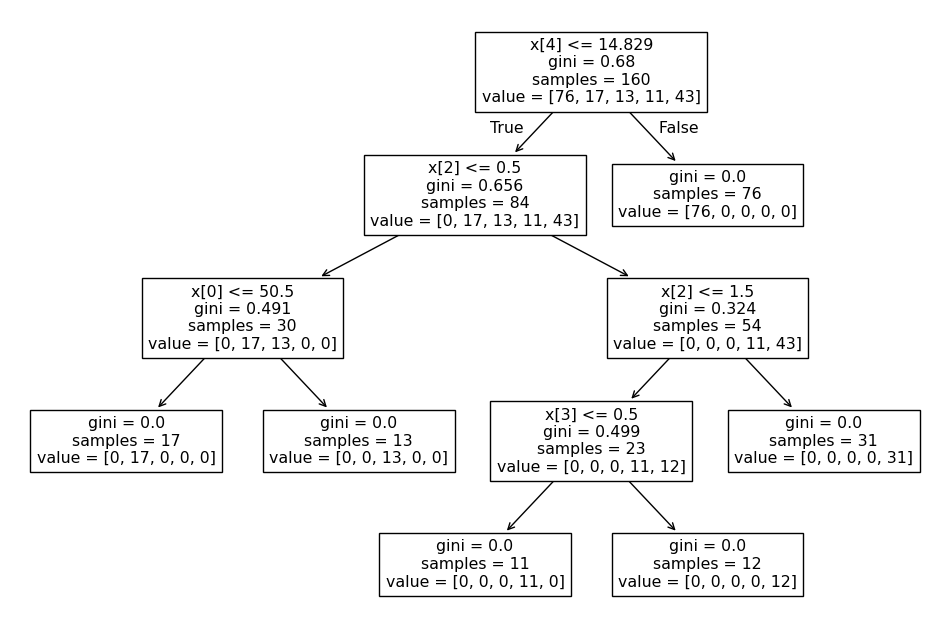

In [48]:
from sklearn import tree
plt.figure(figsize=(12,8))
tree.plot_tree(cls_gini.fit(X1_train,y1_train))
plt.show()